In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.count(0)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
df.count(1)

0      11
1      12
2      11
3      12
4      11
       ..
886    11
887    12
888    10
889    12
890    11
Length: 891, dtype: int64

In [6]:
df = df.set_index(['Sex', 'Pclass'])
df.head()

PassengerId  Survived  \
Sex    Pclass                          
male   3                 1         0   
female 1                 2         1   
       3                 3         1   
       1                 4         1   
male   3                 5         0   

                                                            Name   Age  SibSp  \
Sex    Pclass                                                                   
male   3                                 Braund, Mr. Owen Harris  22.0      1   
female 1       Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1   
       3                                  Heikkinen, Miss. Laina  26.0      0   
       1            Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1   
male   3                                Allen, Mr. William Henry  35.0      0   

               Parch            Ticket     Fare Cabin Embarked  
Sex    Pclass                                                   
male   3           0         A/5 21171   7.2500   NaN        S  
female 1           0          PC 17599  71.2833   C85        C  
       3           0  STON/O2. 3101282   7.9250   NaN        S  
       1           0            113803  53.1000  C123        S  
male   3           0            373450   8.0500   NaN        S

In [7]:
df.count(level = "Sex")

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,314,314,314,261,314,314,314,314,97,312
male,577,577,577,453,577,577,577,577,107,577


In [8]:
df.count(level = "Pclass")

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,
1,216,216,216,186,216,216,216,216,176,214
2,184,184,184,173,184,184,184,184,16,184
3,491,491,491,355,491,491,491,491,12,491


In [10]:
df = df.reset_index()

In [11]:
df

,Sex,Pclass,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,male,3,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,female,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,female,3,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,female,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,male,3,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,2,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S
887,female,1,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S
888,female,3,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S
889,male,1,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C


In [12]:
df.groupby('Pclass')['Fare'].agg('count')

Pclass
1    216
2    184
3    491
Name: Fare, dtype: int64

In [16]:
df['Pclass'].value_counts(sort = True, ascending = True)

2    184
1    216
3    491
Name: Pclass, dtype: int64

In [17]:
df['Pclass'].value_counts(normalize = True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [18]:
df['Fare'].value_counts(bins = 3)

(-0.513, 170.776]     871
(170.776, 341.553]     17
(341.553, 512.329]      3
Name: Fare, dtype: int64

In [19]:
pd.crosstab(df['Sex'], df['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [21]:
pd.crosstab(df['Sex'], df['Pclass'], margins = True, margins_name = 'Total')

Pclass,1,2,3,Total
Sex,,,,
female,94,76,144,314
male,122,108,347,577
Total,216,184,491,891


In [22]:
pd.crosstab(df['Sex'], df['Pclass'], margins = True, margins_name = 'Total', normalize = True)

Pclass,1,2,3,Total
Sex,,,,
female,0.105499,0.085297,0.161616,0.352413
male,0.136925,0.121212,0.389450,0.647587
Total,0.242424,0.206510,0.551066,1.000000


In [23]:
pd.crosstab(df['Sex'], df['Pclass'], margins = True, margins_name = 'Total', normalize = 'columns')

Pclass,1,2,3,Total
Sex,,,,
female,0.435185,0.413043,0.293279,0.352413
male,0.564815,0.586957,0.706721,0.647587


In [24]:
pd.crosstab(df['Sex'], df['Pclass'], margins = True, margins_name = 'Total', normalize = 'index')

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386
Total,0.242424,0.206510,0.551066


In [25]:
pd.crosstab(df['Sex'], df['Pclass'], values = df['Fare'], aggfunc = "mean").round(2)

Pclass,1,2,3
Sex,,,
female,106.13,21.97,16.12
male,67.23,19.74,12.66


In [26]:
pd.crosstab(df['Pclass'], [df['Sex'], df['Survived']])

Sex      female     male    
Survived      0   1    0   1
Pclass                      
1             3  91   77  45
2             6  70   91  17
3            72  72  300  47

In [27]:
pd.crosstab(df['Pclass'], [df['Sex'], df['Survived']], normalize = True)

Sex         female                male          
Survived         0         1         0         1
Pclass                                          
1         0.003367  0.102132  0.086420  0.050505
2         0.006734  0.078563  0.102132  0.019080
3         0.080808  0.080808  0.336700  0.052750

In [28]:
pd.crosstab([df['Pclass'], df['Sex']], [df['Embarked'], df['Survived']],
           rownames = ['Pclass', 'Gender'],
           colnames = ['Embarked', 'Survived'])

Embarked        C       Q        S    
Survived        0   1   0   1    0   1
Pclass Gender                         
1      female   1  42   0   1    2  46
       male    25  17   1   0   51  28
2      female   0   7   0   2    6  61
       male     8   2   1   0   82  15
3      female   8  15   9  24   55  33
       male    33  10  36   3  231  34

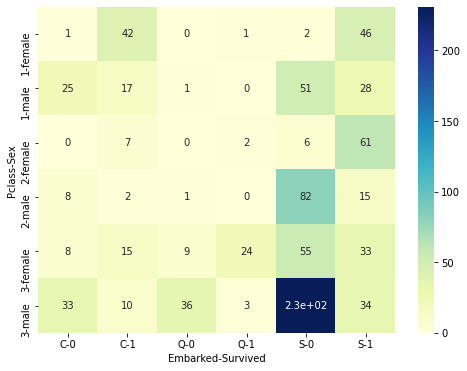

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab([df['Pclass'], df['Sex']], [df['Embarked'], df['Survived']]), cmap ='YlGnBu', annot = True)
plt.show()